<a href="https://colab.research.google.com/github/Amirrezahmi/Video-Inpainting-and-Voice-Cloning/blob/main/video%20inpainting/image%20segmentation/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 98.4 MB/s eta 0:00:00


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 129.2 MB/s eta 0:00:00


In [3]:
from transformers import pipeline

In [4]:
import numpy as np

In [ ]:
# video

In [15]:
model = pipeline("image-segmentation")
results = model("/content/licensed-image.jpeg")

# Print the labels with their indices
for i, result in enumerate(results):
    print(f"{i}: {result['label']}")

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrFor

0: LABEL_187
1: road
2: LABEL_184
3: elephant
4: LABEL_193


In [16]:
indices_input = input("Enter the indices of the labels to keep, separated by space: ")
indices = list(map(int, indices_input.split()))

Enter the indices of the labels to keep, separated by space: 3


In [17]:
# Initialize a binary mask with all zeros
combined_binary_mask = np.zeros_like(np.array(results[0]["mask"]))

for index in indices:
    # Convert the mask to a numpy array
    mask_array = np.array(results[index]["mask"])

    # Apply a threshold to convert the grayscale mask to binary
    threshold = 128  # Adjust this threshold value as needed
    binary_mask = np.where(mask_array >= threshold, 255, 0).astype(np.uint8)

    # Combine the binary masks using the logical OR operation
    combined_binary_mask = np.logical_or(combined_binary_mask, binary_mask)

# Convert the combined binary mask to uint8
combined_binary_mask = combined_binary_mask.astype(np.uint8) * 255

In [18]:
from PIL import Image
# Load the image
image = Image.open("/content/licensed-image.jpeg")

# Create a transparent image
transparent_image = Image.new("RGBA", image.size, (0, 0, 0, 0))

# Paste the original image onto the transparent image using the combined binary mask
transparent_image.paste(image, (0, 0), mask=Image.fromarray(combined_binary_mask))

# Save or display the transparent image
transparent_image.save("transparent_image.png")
transparent_image.show()

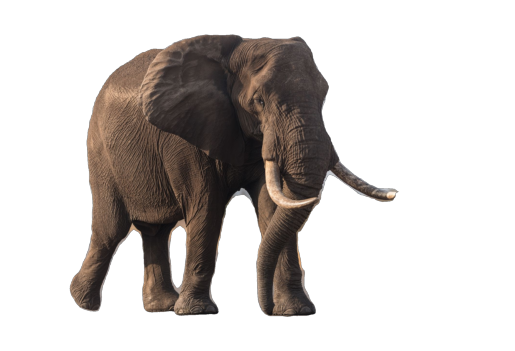

In [31]:
im=plt.imread("transparent_image.png")
plt.imshow(im)
plt.axis('off')
plt.show()

In [ ]:
# end video

In [ ]:
#binary mask

In [26]:

import cv2
import numpy as np
from PIL import Image

# Load the image and mask
image_path = "/content/licensed-image.jpeg"
mask = model("licensed-image.jpeg")[3]["mask"]

# Convert the mask to a numpy array
mask_array = np.array(mask)

# Invert the mask to make the object white and the background black
inverted_mask = cv2.bitwise_not(mask_array)

# Convert the inverted mask to a binary mask
threshold = 128  # Adjust this threshold value as needed
binary_mask = np.where(inverted_mask >= threshold, 255, 0).astype(np.uint8)

# Apply the binary mask to the image
image = cv2.imread(image_path)
result = cv2.bitwise_and(image, image, mask=binary_mask)

# Convert the result to grayscale
gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Convert the grayscale result to binary
(thresh, binary_result) = cv2.threshold(gray_result, 1, 255, cv2.THRESH_BINARY)

# Convert the binary result to RGB
binary_result_rgb = cv2.cvtColor(binary_result, cv2.COLOR_GRAY2RGB)

# Convert the binary result to PIL image
result_image = Image.fromarray(binary_result_rgb)

# Save or display the result image
result_image.save("object_white_background_black.png")
result_image.show()

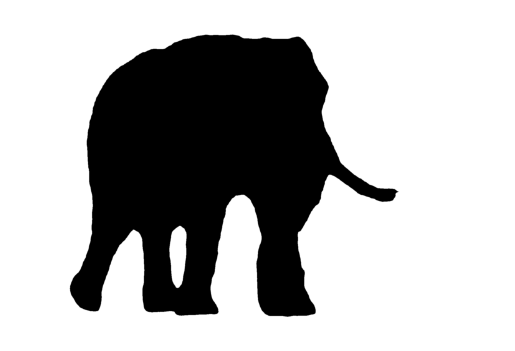

In [28]:
im=plt.imread("object_white_background_black.png")
plt.imshow(im)
plt.axis('off')
plt.show()

In [29]:
from PIL import Image
import numpy as np

# Load the binary image
binary_image_path = '/content/object_white_background_black.png'
binary_image = Image.open(binary_image_path)

# Convert the image to a numpy array
binary_array = np.array(binary_image)

# Invert the binary values (0 to 1 and 1 to 0)
inverted_array = np.logical_not(binary_array).astype(np.uint8) * 255

# Create a new PIL image from the inverted array
inverted_image = Image.fromarray(inverted_array)

# Save the inverted image
inverted_image.save('inverted_image.png')

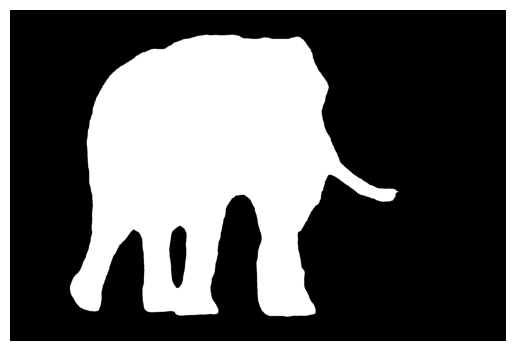

In [30]:
im=plt.imread('inverted_image.png')
plt.imshow(im)
plt.axis('off')
plt.show()

In [ ]:
#add

In [20]:

from PIL import Image

# Load both images
photo1 = Image.open('/content/transparent_image.png')
photo2 = Image.open('/content/transparent_image.jpg')


# Ensure both images have the same size
if photo1.size != photo2.size:
    print("Both images must have the same size.")
    try:
      photo1 = photo1.resize(photo2.size)
    except:
      photo2 = Image.open('/content/transparent_image.png')
      photo1 = Image.open('/content/elephant_with_transparent_background.webp')
      photo1 = photo1.resize(photo2.size)


    # Overlay photo1 onto photo2 with transparency
photo2.paste(photo1, (0, 0), photo1)

    # Save the result
photo2.save('output.png')
print("Photos matched and saved as 'output.png'.")

Both images must have the same size.
Photos matched and saved as 'output.png'.


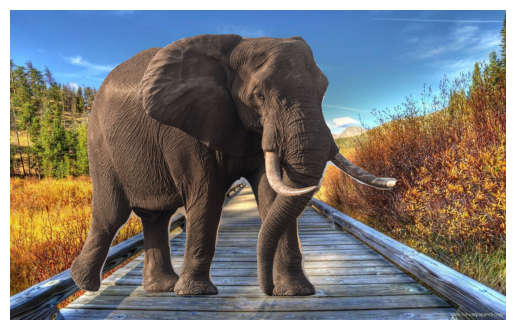

In [24]:
import matplotlib.pyplot as plt

im = plt.imread('output.png')
plt.imshow(im)
plt.axis('off')
plt.show()

In [32]:
# Now using segformer b0 by nvidia

In [34]:
from transformers import pipeline
import numpy as np
from PIL import Image

# Load the model
model = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512")

results = model("/content/licensed-image.jpeg")

# Print the labels with their indices
for i, result in enumerate(results):
    print(f"{i}: {result['label']}")

indices_input = input("Enter the indices of the labels to keep, separated by space: ")
indices = list(map(int, indices_input.split()))

# Initialize a binary mask with all zeros
combined_binary_mask = np.zeros_like(np.array(results[0]["mask"]))

for index in indices:
    # Convert the mask to a numpy array
    mask_array = np.array(results[index]["mask"])

    # Apply a threshold to convert the grayscale mask to binary
    threshold = 128  # Adjust this threshold value as needed
    binary_mask = np.where(mask_array >= threshold, 255, 0).astype(np.uint8)

    # Combine the binary masks using the logical OR operation
    combined_binary_mask = np.logical_or(combined_binary_mask, binary_mask)

# Convert the combined binary mask to uint8
combined_binary_mask = combined_binary_mask.astype(np.uint8) * 255

# Load the image
image = Image.open("/content/licensed-image.jpeg")

# Create a transparent image
transparent_image = Image.new("RGBA", image.size, (0, 0, 0, 0))

# Paste the original image onto the transparent image using the combined binary mask
transparent_image.paste(image, (0, 0), mask=Image.fromarray(combined_binary_mask))

# Save or display the transparent image
transparent_image.save("transparent_image1.png")
transparent_image.show()


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


0: sky
1: earth
2: rock
3: animal
Enter the indices of the labels to keep, separated by space: 3


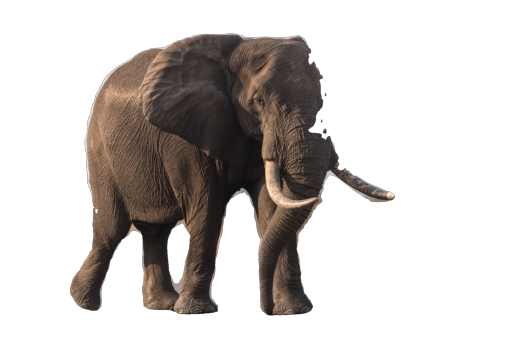

In [38]:
import matplotlib.pyplot as plt

im = plt.imread('transparent_image1.png')
plt.imshow(im)
plt.axis('off')
plt.show()

In [36]:
from PIL import Image

# Load both images
photo1 = Image.open('/content/transparent_image1.png')
photo2 = Image.open('/content/transparent_image.jpg')


# Ensure both images have the same size
if photo1.size != photo2.size:
    print("Both images must have the same size.")
    try:
      photo1 = photo1.resize(photo2.size)
    except:
      photo2 = Image.open('/content/transparent_image.png')
      photo1 = Image.open('/content/elephant_with_transparent_background.webp')
      photo1 = photo1.resize(photo2.size)


    # Overlay photo1 onto photo2 with transparency
photo2.paste(photo1, (0, 0), photo1)

    # Save the result
photo2.save('output1.png')
print("Photos matched and saved as 'output.png'.")

Both images must have the same size.
Photos matched and saved as 'output.png'.


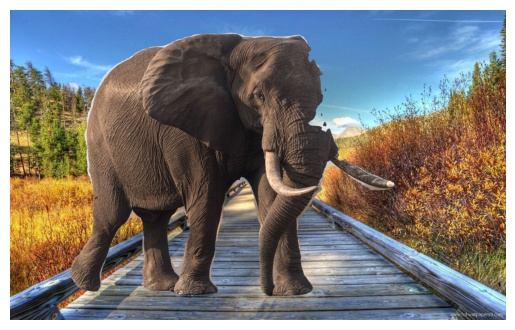

In [37]:
import matplotlib.pyplot as plt

im = plt.imread('output1.png')
plt.imshow(im)
plt.axis('off')
plt.show()